In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

L3


In [11]:
def fact(n):
  result=1
  for i in range(1,n+1):
    result*=i
  return result



In [12]:
def f(x,n):
  sum=0
  for i in range(n+1):
    sum=sum+((x**i)/fact(i))
  return sum

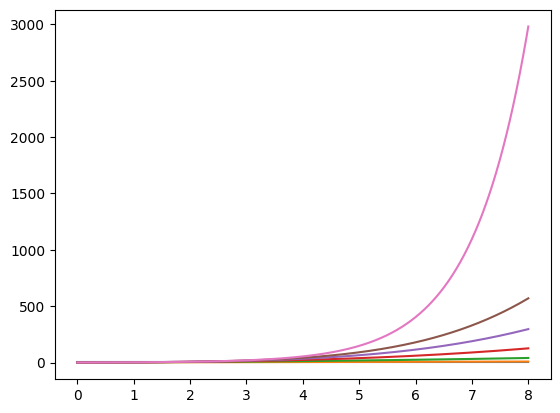

In [13]:
x=np.linspace(0,8,800)
y=np.exp(x)

p0=pow(x,0)
p1=1+x
p2=1+x+pow(x,2)/2
p3=1+x+pow(x,2)/2+pow(x,3)/6
p4=1+x+pow(x,2)/2+pow(x,3)/6+pow(x,4)/24
p5=1+x+pow(x,2)/2+pow(x,3)/6+pow(x,4)/24+pow(x,5)/120

plt.plot(x,p0)
plt.plot(x,p1)
plt.plot(x,p2)
plt.plot(x,p3)
plt.plot(x,p4)
plt.plot(x,p5)
plt.plot(x,y)
plt.show()

L4

**Lagrange’s interpolation**

In [17]:
def Lagrange(n,X,Y,x):
  sum=0
  for i in range(n):
    prod=Y[i]
    for j in range(n):
      if i!=j:
        prod*=((x-X[j])/(X[i]-X[j]))
    sum+=prod
  return sum

def estimate(n,X,Y,x,f):
  y=round(Lagrange(n,X,Y,x),5)
  print("Approximate value =",y)
  real=round(f(x),7)
  print("Error=",abs((real-y)/real))



In [15]:
 f1 = lambda x: math.exp(x)

In [18]:
print("Example 1")
X=[0,2]
Y=[1,7.3891]
estimate(2,X,Y,1,f1)

Example 1
Approximate value = 4.19455
Error= 0.5430887261210369


**Bisection method**

In [19]:
def check(a,b):
  if f(a)*f(b)>0:
    exit()
  if f(a)==0:
    return a
  if f(b)==0:
    return b
  if f(a)*f(b)<0:
    return True
def bis(a,b):
  for i in range(M):
    if (check(a,b)==True and i==0):
      x=(a+b)/2
    elif(type(check(a,b)== "int"and i==0)):
      x=check(a,b)
      break
    else:
      if(check(a,x)):
        b=x
      else:
        a=x
      y=(a+b)/2
      if(i>0 and x!=0):
        eapprox=abs((y-x)/x)
      else:
        eapprox=1000
      if (TV!=0):
        etrue=abs((TV-y)/TV)

      if(eapprox<es and f(y)<e):
        break
      else:
        x=y
      exit()
    print("The root is",x)


In [20]:
a=0
b=0.5
M=1000
e=10**(-5)

def f(x):
  return x+1-2*(math.sin((math.pi)*x))

bis(a,b)

The root is 0.25


**Regula False method**

In [21]:
def rf(a,b):
  if f(a)*f(b)>0:
    exit()
  if f(a)==0:
    return a
    x=a
  if f(b)==0:
    return b
    x=b
  for i in range(M):
    y=b-f(b)*(b-a)/(f(b)-f(a))

    print("The root is :",y)
    break
    if f(a)*f(y)<0:
      b=y
    else:
      a=y

  exit()

In [22]:
M=1000
def f(x):
  return x**4-2*x**3-4*(x**2)+4*x+4
rf(-2,1)

The root is : 2.0


**Fixed point**

In [5]:
def fixed_point(f,x0,M,es,e):
    eapprox=0.0
    # print("Iteration\txi\t\tEa\t\t|f(xi)|\t\t|g(xi)|")
    # print("0\t\t",x0,"\t\t0.0\t\t",abs(f(x0)),"\t\t",abs(f(x0)-x0))
    for i in range(1,M):
      x1=f(x0)
      if x1!=0:
        eapprox=abs((x1-x0)/x1)

      # print(i,"\t\t",x1,"\t\t",eapprox,"\t\t",abs(f(x1)),"\t\t",abs(f(x1)-x1))
      if abs(eapprox)<es and abs(f(x1)-x1)<e:

        break
      else:
        x0=x1
    print("Approximate root=",x1)





In [7]:
def f1(x):
    return (1/math.exp(x))


In [8]:
print("e(-x)-x=0")
fixed_point(f1,0,1000,10**-5,10**-6)

e(-x)-x=0
Approximate root= 0.5671437480994115


**Newton-Raphson method**

In [9]:
import math
import sympy as sp

In [14]:
x=sp.symbols("x")
M=1000
e=10**(-5)

In [10]:
def nr(x0):
  for i in range(M):
    if g(x0)==0:
      print("Not root find ")
      return

    x1=x0-f(x0)/g(x0)
    if abs(x1-x0)<e:
      print("Root is ",x1)
      return
    x0=x1

In [15]:
f1=x+1-2*sp.sin(sp.pi*x)
df=sp.diff(f1,x)
f=sp.lambdify(x,f1)
g=sp.lambdify(x,df)
nr(0.23)


Root is  0.20603511956798515


**Secent**

In [16]:
def secant(x0,x1):
  for i in range(M):
    if f(x1)==0:
      print("Not root find ")
      return
    x2=x1-f(x1)*(x1-x0)/(f(x1)-f(x0))
    if abs(x2-x1)<e:
      print("Root is ",x2)
      return
    x0=x1
    x1=x2

In [17]:
def f(x):
  return x**3-7*x**2+14*x-6

secant(0,1)


Root is  0.5857864398080769


In [18]:
def backward_substitution(U, y):
    n = len(y)
    x = [0] * n
    x[n-1] = y[n-1] / U[n-1][n-1]

    for i in range(n-2, -1, -1):
        sum = y[i]
        for j in range(i+1, n):
            sum -= U[i][j] * x[j]
        x[i] = sum / U[i][i]

    return x

# Example usage:
U = [[4, -1, 1],
     [0, 3, -2],
     [0, 0, 5]]
y = [3, 7, 2]

x = backward_substitution(U, y)
print("Solution for Backward Substitution:", x)


Solution for Backward Substitution: [1.2999999999999998, 2.6, 0.4]


In [19]:
def forward_substitution(L, b):
    n = len(b)
    y = [0] * n
    y[0] = b[0] / L[0][0]

    for i in range(1, n):
        sum = b[i]
        for j in range(i):
            sum -= L[i][j] * y[j]
        y[i] = sum / L[i][i]

    return y

# Example usage:
L = [[1, 0, 0],
     [2, 1, 0],
     [1, 2, 1]]
b = [1, 2, 3]

y = forward_substitution(L, b)
print("Solution for Forward Substitution:", y)


Solution for Forward Substitution: [1.0, 0.0, 2.0]
